In [7]:
# importation de la base de données
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# importation de la base de données
unknowndata= pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\Projet Informatique\Base Crowdfunding_2.xlsx')
unknowndata #affichage des données du jeu de données
unknowndata.info()#résumé sur le dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   ID_des entreprises                                      44 non-null     int64 
 1   Chiffres d'affaires (en milliers d'€)                   44 non-null     int64 
 2   Montant de financement participatif  (en milliers d'€)  44 non-null     int64 
 3   Type de financement                                     44 non-null     object
 4   Revenus nets  (en milliers d'€)                         44 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ KB


In [8]:
unknowndata

,ID_des entreprises,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Type de financement,Revenus nets (en milliers d'€)
0,1,200,55,equity crowdfunding,400
1,2,400,37,reward crowdfunding,500
2,3,500,76,crowdlending,700
3,4,500,35,reward crowdfunding,350
4,5,270,15,equity crowdfunding,500
5,6,400,27,reward crowdfunding,500
6,7,300,15,crowdlending,430
7,8,700,40,reward crowdfunding,780
8,9,210,23,equity crowdfunding,300
9,10,250,12,crowdlending,430


In [9]:
unknowndata.columns #afficher les noms des variables

Index(['ID_des entreprises', 'Chiffres d'affaires (en milliers d'€)',
       'Montant de financement participatif  (en milliers d'€)',
       'Type de financement  ', 'Revenus nets  (en milliers d'€)'],
      dtype='object')

In [10]:
unknowndata.count()#afficher le nombre d'obs

ID_des entreprises                                        44
Chiffres d'affaires (en milliers d'€)                     44
Montant de financement participatif  (en milliers d'€)    44
Type de financement                                       44
Revenus nets  (en milliers d'€)                           44
dtype: int64

In [11]:
unknowndata = unknowndata.drop(columns=['ID_des entreprises','Type de financement  ']) #suppression de certaines variables inutiles pour notre modelisation

les doublons sont :  0
les valeurs aberrantes sont : 
    Chiffres d'affaires (en milliers d'€)  \
19                                    980   
25                                    978   

    Montant de financement participatif  (en milliers d'€)  \
19                                                200        
25                                                210        

    Revenus nets  (en milliers d'€)  
19                              990  
25                              995  


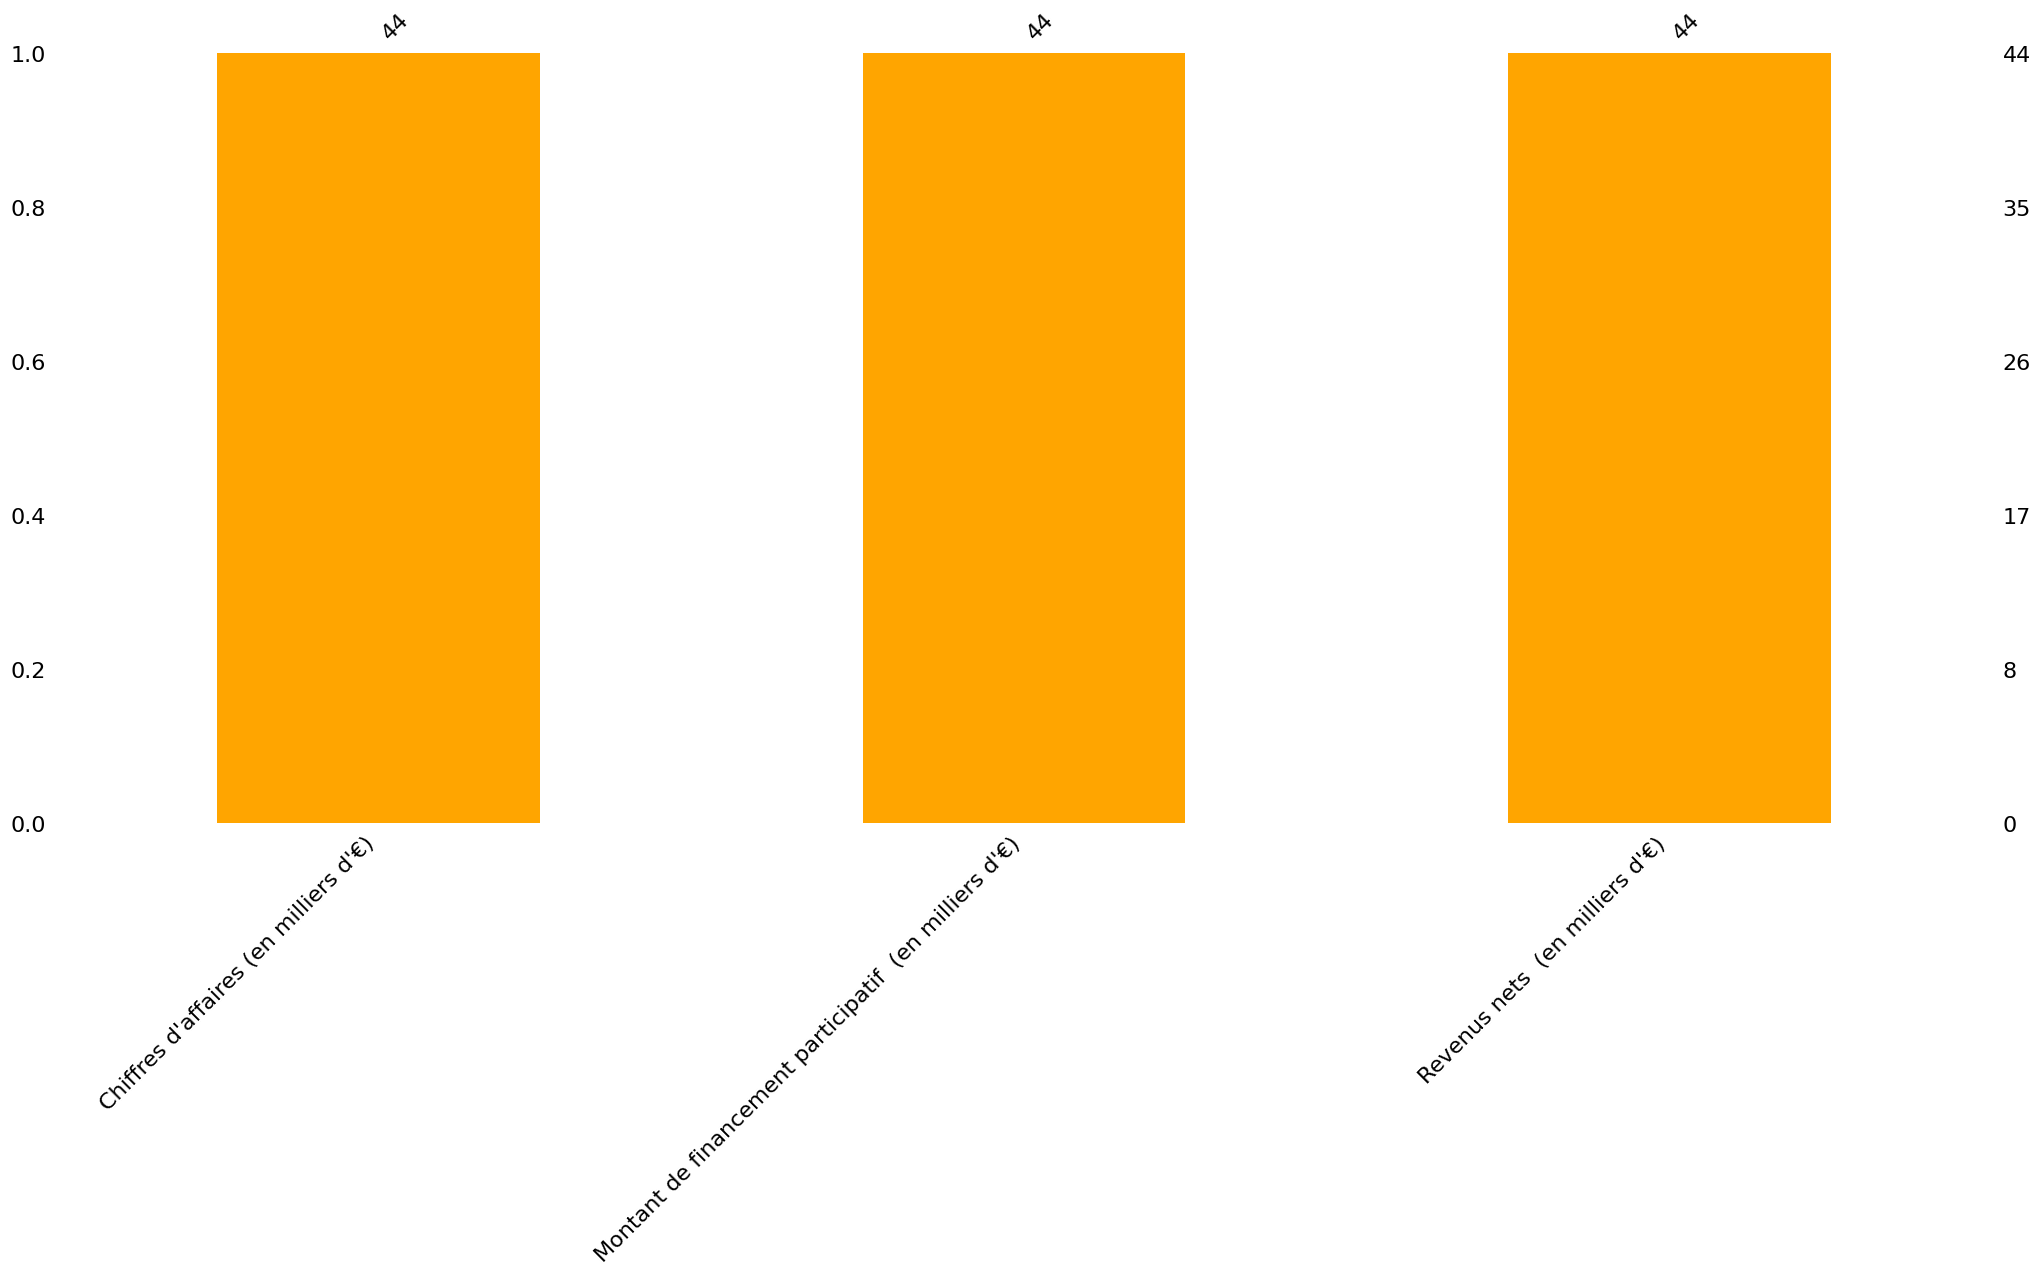

In [16]:
msno.bar(unknowndata, color='orange')#afficher les valeurs manquantes
duplicatedata= unknowndata.duplicated().sum()#afficher les doublons

# détection des outliers avec la méthode iqr
Q1 = unknowndata.quantile(0.25)
Q3 = unknowndata.quantile(0.75)
IQR = Q3-Q1
outliers=((unknowndata<(Q1-1.5*IQR))|(unknowndata >(Q3+1.5*IQR)))
valeurs_aberrantes=unknowndata[outliers.any(axis=1)]

# affichage des résultats
print("les doublons sont : ",duplicatedata)
print("les valeurs aberrantes sont : ")
print(valeurs_aberrantes)

In [19]:
# suppression des lignes contenant des outliers
unknowndata= unknowndata.drop(valeurs_aberrantes.index)

In [20]:
unknowndata

,Chiffres d'affaires (en milliers d'€),Montant de financement participatif (en milliers d'€),Revenus nets (en milliers d'€)
0,200,55,400
1,400,37,500
2,500,76,700
3,500,35,350
4,270,15,500
5,400,27,500
6,300,15,430
7,700,40,780
8,210,23,300
9,250,12,430


<Axes: >

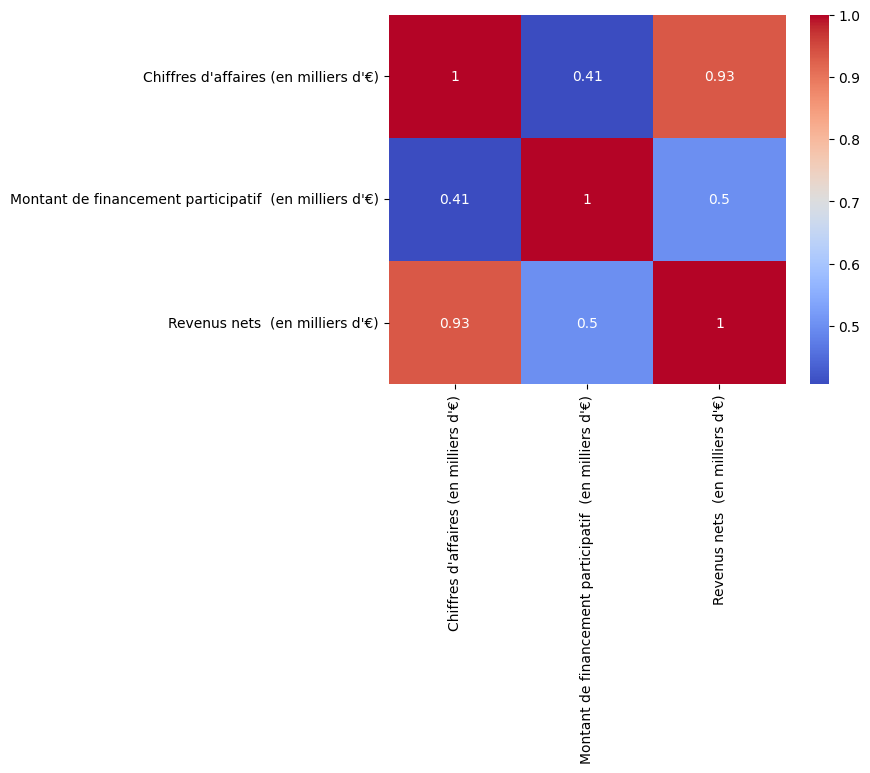

In [21]:
stat=unknowndata.describe()
stat #afficher la statistique
corree= unknowndata.corr()
sns.heatmap(corree, annot=True, cmap='coolwarm')#afficher la matrice de corrélation sous forme graphique

[Text(0.5, 1.0, 'Revenus nets  vs le montant de financement participatif'),
 Text(0.5, 0, 'Revenus nets'),
 Text(0, 0.5, 'montant de financement participatif')]

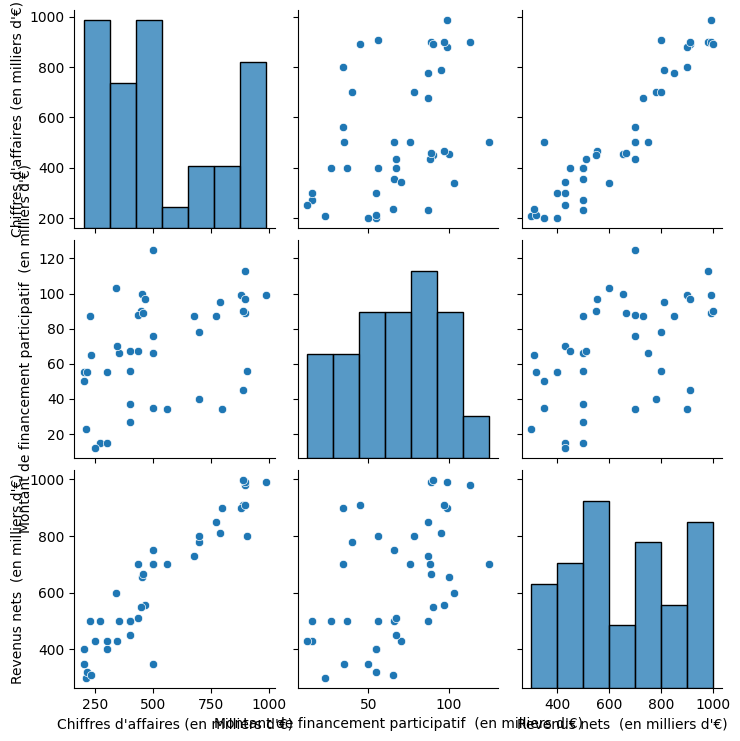

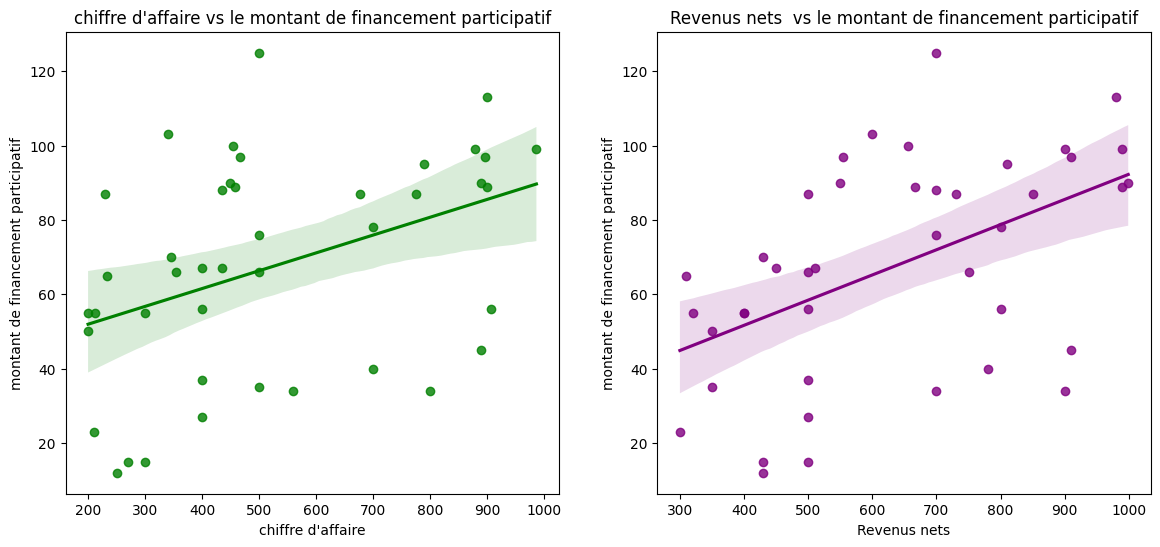

In [22]:
sns.pairplot(unknowndata) #visualisation graphique des données

# relation entre la variable à prédire et les prédicteurs
fig, ax=plt.subplots(1,2, figsize=(14,6))
sns.regplot(data=unknowndata, x='Chiffres d\'affaires (en milliers d\'€)', y= 'Montant de financement participatif  (en milliers d\'€)', color='green', ax=ax[0])
ax[0].set(
    title=('chiffre d\'affaire vs le montant de financement participatif'),
    xlabel=('chiffre d\'affaire'),
    ylabel=('montant de financement participatif')
)

sns.regplot(data=unknowndata, x='Revenus nets  (en milliers d\'€)', y= 'Montant de financement participatif  (en milliers d\'€)', color='purple', ax=ax[1])
ax[1].set(
    title=('Revenus nets  vs le montant de financement participatif'),
    xlabel=('Revenus nets'),
    ylabel=('montant de financement participatif')
)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [24]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Normalisation
variables =['Chiffres d\'affaires (en milliers d\'€)','Montant de financement participatif  (en milliers d\'€)', 'Revenus nets  (en milliers d\'€)']
min_max_scaler = MinMaxScaler()
data_normalized = unknowndata.copy()
data_normalized[variables] = min_max_scaler.fit_transform(unknowndata[variables])

# Préparation des données normalisées pour l'entraînement et l'évaluation prédicitve
x = data_normalized.drop(columns=['Montant de financement participatif  (en milliers d\'€)']) # les prédicteurs
y= data_normalized['Montant de financement participatif  (en milliers d\'€)'] #variable à prédire

#division des données normalisées en sous-ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=808)

# Ajout des constants
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

# entraînement du modèle
model = sm.OLS(y_train, x_train_const).fit()
print(model.summary())

# prédiction
y_pred = model.predict(x_test_const)

"PREMIERE EVALUATION DE LA PERFORMANCE PREDICTIVE DE NOTRE PROJET"


# évaluation de la performance prédictive
print("RMSE",mean_squared_error(y_test, y_pred))
print("MAPE",mean_absolute_percentage_error(y_test, y_pred))

                                              OLS Regression Results                                              
Dep. Variable:     Montant de financement participatif  (en milliers d'€)   R-squared:                       0.318
Model:                                                                OLS   Adj. R-squared:                  0.273
Method:                                                     Least Squares   F-statistic:                     6.993
Date:                                                    Sun, 30 Jun 2024   Prob (F-statistic):            0.00321
Time:                                                            14:07:49   Log-Likelihood:                 5.4522
No. Observations:                                                      33   AIC:                            -4.904
Df Residuals:                                                          30   BIC:                           -0.4149
Df Model:                                                               2       

In [27]:
from sklearn.metrics import make_scorer

In [28]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


"AUTRES MODELES TESTER POUR TROUVER LE MODELE QUI EVALUE BIEN LA PERFORMANCE DU MODELE : Dans ce cas, nous avons utilisé autres modèles comme les méthodes régularisées (les regressions ridge et lasso) et l'ensemble learning comme la forêt aléatoire"


# Créer un scorer RMSE pour la validation croisée
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Modèles à tester
models = {
    'Linear Regression': sm.OLS(y_train, x_train_const),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=808)
}

# Evaluation des modèles
# Evaluation des modèles
print("Évaluation des modèles sur données normalisées:")
for name, model in models.items():
    if name == 'Linear Regression':
        results = model.fit().predict(x_test_const)
        score = rmse(y_test, results)
    else:
        model.fit(x_train_const, y_train)
        y_pred = model.predict(x_test_const)
        score = rmse(y_test, y_pred)
    print(f"{name}: RMSE = {score:.4f}")

Évaluation des modèles sur données normalisées:
Linear Regression: RMSE = 0.2557
Ridge Regression: RMSE = 0.2706
Lasso Regression: RMSE = 0.2740
Random Forest: RMSE = 0.2644


In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.linear_model import LinearRegression


In [33]:
"validation croisée sur la regression linéaire"

# Définition du modèle de régression linéaire
model = LinearRegression()

# Validation croisée pour évaluer la performance du modèle
cv_scores = cross_val_score(model, x_train_const, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Affichage des scores de validation croisée
print("Scores de RMSE pour chaque fold de la validation croisée : ", cv_rmse_scores)
print("RMSE moyen de la validation croisée : ", cv_rmse_scores.mean())


Scores de RMSE pour chaque fold de la validation croisée :  [0.17683309 0.29384005 0.21501135 0.24392528 0.20099148]
RMSE moyen de la validation croisée :  0.22612025084773527


In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold


In [35]:
"comparaison de la validation croisée de la regression linéaire et la forêt aléatoire "

"OPTIMISATION DES HYPERPARAMETRES POUR AMELIORER LA ROBUSTESSE DES MODELES"


# Définir le modèle de forêt aléatoire
model_rf = RandomForestRegressor(random_state=808)

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10]  # Nombre minimum d'échantillons requis pour scinder un nœud
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(x_train_const, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Obtenez le meilleur modèle
best_model_rf = grid_search.best_estimator_
print(best_model_rf)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres trouvés :
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestRegressor(min_samples_split=10, random_state=808)


In [36]:
"VALIDATION CROISEE APRES OPTIMISATION DES HYPERPARAMETRES"


# Définir la validation croisée (par exemple, K-Fold avec K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=808)

# Liste pour stocker les résultats de la validation croisée
cv_results = []

# Effectuer la validation croisée
for train_index, val_index in kf.split(x_train_const):
    x_train_fold, x_val_fold = x_train_const.iloc[train_index], x_train_const.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Entraîner le meilleur modèle sur le pli actuel
    best_model_rf.fit(x_train_fold, y_train_fold)
    
    # Faire des prédictions sur l'ensemble de validation
    y_pred_fold = best_model_rf.predict(x_val_fold)
    
    # Calculer l'erreur quadratique moyenne sur l'ensemble de validation
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    cv_results.append(fold_rmse)

# Calculer la moyenne et l'écart-type des résultats de validation croisée
mean_cv_rmse = np.mean(cv_results)
std_cv_rmse = np.std(cv_results)

print(f"Validation croisée RMSE moyenne : {mean_cv_rmse:.4f} +/- {std_cv_rmse:.4f}")

Validation croisée RMSE moyenne : 0.2201 +/- 0.0227
